In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
from geofunctions import utils
import os

In [3]:
import importlib

importlib.reload(utils)

<module 'geofunctions.utils' from '/Users/inessat/Documents/phd/empirics/israel/notebooks/phd-remote-work/geofunctions/utils.py'>

In [4]:
months = utils.return_list_months_ok()

## Layer with home locations by geohash

In [5]:
full_list_df = []

In [6]:
months_files = os.listdir(utils.get_path("processed", "dwells", "work"))
months_files = [f for f in months_files if f.endswith(".csv")]

In [7]:
sorted(months_files)

['users_work_home_201901.csv',
 'users_work_home_201904.csv',
 'users_work_home_201907.csv',
 'users_work_home_201908.csv',
 'users_work_home_201909.csv',
 'users_work_home_201911.csv',
 'users_work_home_201912.csv',
 'users_work_home_202001.csv',
 'users_work_home_202002.csv',
 'users_work_home_202003.csv',
 'users_work_home_202004.csv',
 'users_work_home_202005.csv',
 'users_work_home_202006.csv',
 'users_work_home_202007.csv',
 'users_work_home_202008.csv',
 'users_work_home_202009.csv',
 'users_work_home_202010.csv',
 'users_work_home_202011.csv',
 'users_work_home_202101.csv',
 'users_work_home_202102.csv',
 'users_work_home_202103.csv',
 'users_work_home_202104.csv',
 'users_work_home_202105.csv',
 'users_work_home_202106.csv',
 'users_work_home_202107.csv',
 'users_work_home_202108.csv',
 'users_work_home_202109.csv',
 'users_work_home_202110.csv',
 'users_work_home_202111.csv',
 'users_work_home_202112.csv',
 'users_work_home_202201.csv',
 'users_work_home_202202.csv',
 'users_

In [65]:
for monthly_file in sorted(months_files):

    MONTH = monthly_file.split("_")[-1][:-4]
    print(MONTH)
    # Layer with Home location
    home_df = pd.read_csv(
        os.path.join(
            utils.get_path("processed", "dwells", "home"),
            f"home_geohashes_night_shabbat_{MONTH}.csv",
        )
    )
    home_df_geohash = home_df.groupby("geohash")["identifier"].count().reset_index()
    home_df_geohash["geometry"] = home_df_geohash["geohash"].apply(
        utils.geohash_to_polygon
    )
    home_df_geohash = utils.make_gdf(home_df_geohash, crs=4326, geometry="geometry")

    # Layer with work locations in geohash
    work_df = pd.read_csv(
        os.path.join(
            utils.get_path("processed", "dwells", "work"),
            f"users_work_home_{MONTH}.csv",
        ),
        index_col=0,
    )
    work_df_geohash = (
        work_df.groupby("geohash_work")["identifier"].count().reset_index()
    )
    work_df_geohash["geometry"] = work_df_geohash["geohash_work"].apply(
        utils.geohash_to_polygon
    )
    work_df_geohash = work_df_geohash.rename(columns={"geohash_work": "geohash"})
    work_df_geohash = utils.make_gdf(work_df_geohash, crs=4326, geometry="geometry")

    # Merge the two datasets (outer join)
    merged_df = pd.merge(home_df_geohash, work_df_geohash, on="geohash", how="outer")

    # Fill NaN values with 0 for counts
    merged_df["num_homes"] = merged_df["identifier_x"].fillna(0).astype(int)
    merged_df["num_works"] = merged_df["identifier_y"].fillna(0).astype(int)
    merged_df = merged_df.drop(["identifier_x", "identifier_y"], axis=1)

    # Determine type based on prevailing numbers
    merged_df["type"] = np.where(
        merged_df["num_homes"] > merged_df["num_works"], "Home", "Work"
    )
    merged_df["geometry"] = np.where(
        merged_df["geometry_x"].isnull(),
        merged_df["geometry_y"],
        merged_df["geometry_x"],
    )
    merged_df = merged_df.drop(["geometry_x", "geometry_y"], axis=1)
    merged_df["month"] = MONTH
    full_list_df.append(merged_df)

201901
201904
201907
201908
201909
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008
202009
202010
202011
202101
202102
202103
202104
202105
202106
202107
202108
202109
202110
202111
202112
202201
202202
202203
202204
202205
202206
202207
202208
202209
202210
202211
202301
202302
202303
202304
202305
202306
202309


In [ ]:
home_df_geohash.merge(
    work_df.groupby("geohash_home").size().to_frame(),
    left_on="geohash",
    right_on="geohash_home",
).head(20)

,geohash,identifier,geometry,0
0,swnt5nj,1,"POLYGON ((34.66187 31.77933, 34.66187 31.7807,...",1
1,swnt5nn,3,"POLYGON ((34.66187 31.7807, 34.66187 31.78207,...",2
2,swnt5nx,1,"POLYGON ((34.66461 31.78207, 34.66461 31.78345...",1
3,swnt5w7,1,"POLYGON ((34.66324 31.79855, 34.66324 31.79993...",1
4,swnt74z,4,"POLYGON ((34.68796 31.78207, 34.68796 31.78345...",3
5,swnt75p,3,"POLYGON ((34.68933 31.78207, 34.68933 31.78345...",2
6,swnt75q,6,"POLYGON ((34.6907 31.7807, 34.6907 31.78207, 3...",4
7,swnt75r,3,"POLYGON ((34.6907 31.78207, 34.6907 31.78345, ...",1
8,swnt75x,6,"POLYGON ((34.69208 31.78207, 34.69208 31.78345...",4
9,swnt75y,5,"POLYGON ((34.69345 31.7807, 34.69345 31.78207,...",3


In [68]:
full_df = pd.concat(full_list_df)

# Explore

In [70]:
home_df_geohash.identifier.sum()

np.int64(52898)

In [71]:
work_df_geohash.identifier.sum()

np.int64(25250)

In [72]:
merged_df["num_homes"].sum()

np.int64(52898)

In [73]:
merged_df["num_works"].sum()

np.int64(25250)

In [74]:
full_df.shape

(1284590, 6)

In [75]:
full_df.head()

,geohash,num_homes,num_works,type,geometry,month
0,swnt70p,0,1,Work,"POLYGON ((34.67285 31.78207, 34.67285 31.78345...",201901
1,swnt72d,0,2,Work,"POLYGON ((34.6756 31.78619, 34.6756 31.78757, ...",201901
2,swnt74z,1,0,Home,"POLYGON ((34.68796 31.78207, 34.68796 31.78345...",201901
3,swnt75n,3,0,Home,"POLYGON ((34.68933 31.7807, 34.68933 31.78207,...",201901
4,swnt75p,1,0,Home,"POLYGON ((34.68933 31.78207, 34.68933 31.78345...",201901


In [76]:
full_df.month.unique()

array(['201901', '201904', '201907', '201908', '201909', '201911',
       '201912', '202001', '202002', '202003', '202004', '202005',
       '202006', '202007', '202008', '202009', '202010', '202011',
       '202101', '202102', '202103', '202104', '202105', '202106',
       '202107', '202108', '202109', '202110', '202111', '202112',
       '202201', '202202', '202203', '202204', '202205', '202206',
       '202207', '202208', '202209', '202210', '202211', '202301',
       '202302', '202303', '202304', '202305', '202306', '202309'],
      dtype=object)

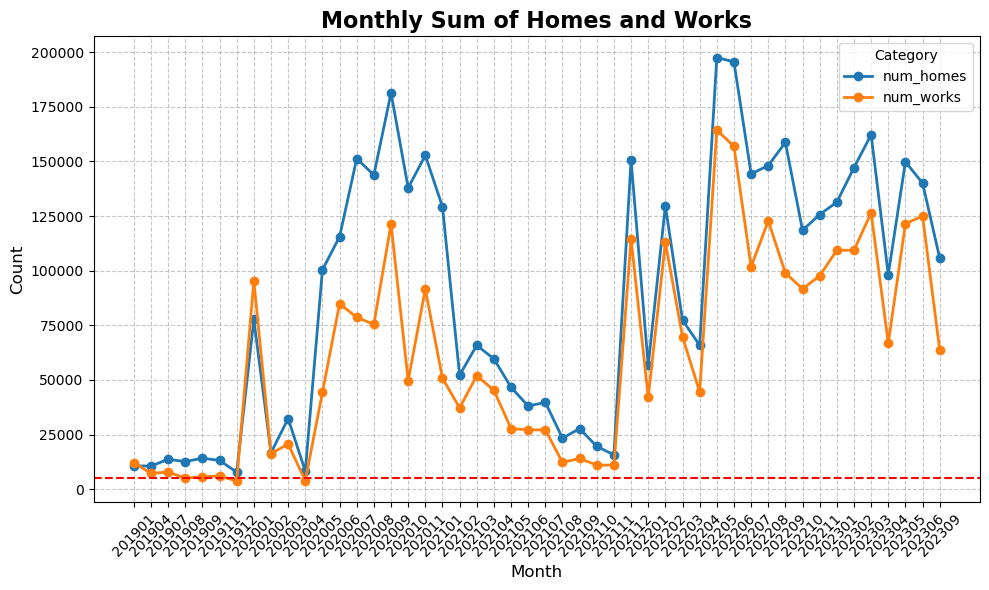

In [77]:
import matplotlib.pyplot as plt

# Grouping and plotting
ax = (
    full_df.groupby("month")[["num_homes", "num_works"]]
    .sum()
    .plot(
        figsize=(10, 6),  # Adjust the figure size
        marker="o",  # Add markers to the lines
        linestyle="-",  # Set line style
        linewidth=2,  # Set line width
    )
)

# Customize the plot
ax.set_title("Monthly Sum of Homes and Works", fontsize=16, fontweight="bold")
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.legend(title="Category", fontsize=10)
ax.grid(visible=True, linestyle="--", alpha=0.7)  # Add a grid

# Add a red dashed horizontal line at y=5000
plt.axhline(y=5000, color="red", linestyle="--", linewidth=1.5, label="Threshold: 5000")

# Make the x-axis labels more readable if 'month' is not numerical
months = (
    full_df["month"].unique().tolist()
)  # Extract unique months  # Spread ticks evenly
ax.set_xticks(range(len(months)))
ax.set_xticklabels(months, rotation=45, fontsize=10)
# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [ ]:
full_df["flag_good_month"] = (
    full_df.groupby("month")["num_works"].transform("sum") > 5000
)

In [ ]:
months_ok = (full_df.groupby("month")["num_works"].sum() > 5000)[
    full_df.groupby("month")["num_works"].sum() > 5000
].index

In [ ]:
months_ok
# saved manually these months to utils

Index(['202001', '202003', '202005', '202006', '202007', '202008', '202009',
       '202010', '202101', '202104', '202106', '202107', '202201', '202203',
       '202204', '202207', '202210', '202211', '202301', '202302', '202303',
       '202304', '202305', '202306', '202309'],
      dtype='object', name='month')

In [82]:
full_df.to_file("../data/to_map/geohash_work_home_stat_monthly.geojson")

# Aggregate by stat area and validate

In [78]:
gdf_census_gush = gpd.read_file(
    utils.get_path("processed", "adm", "geohash_stat_area_pairs.geojson")
)

In [79]:
gdf_census_gush.head(2)

,geohash,index_right,OBJECTID,SHEM_YISHUV_HEB,SHEM_YISHUV_ENG,SEMEL_YISHUV,YISHUV_STAT_2022,STAT_2022,Stat2022_Unite,Stat2022_Ref,Main_Function_Code,Main_Function_Txt,ROVA,TAT_ROVA,geometry
0,swnt5jy,15,119,אשדוד,ASHDOD,70,700622,622.0,622,NaN,1.0,מגורים,6.0,62.0,"POLYGON ((34.66049 31.7807, 34.66049 31.78207,..."
1,swnt5tz,10,76,אשדוד,ASHDOD,70,700142,142.0,142,NaN,1.0,מגורים,1.0,14.0,"POLYGON ((34.66049 31.80405, 34.66049 31.80542..."


In [80]:
full_df_census = full_df.merge(
    gdf_census_gush[["geohash", "YISHUV_STAT_2022"]], on="geohash"
)

In [81]:
statarea_hw = full_df_census.groupby(["YISHUV_STAT_2022", "month"])[
    ["num_homes", "num_works"]
].sum()

## Add census data

In [82]:
census_gushdan = gpd.read_file(
    utils.get_path("processed", "census", "census_gushdan_main_features.geojson")
)

In [39]:
census_gushdan.columns

Index(['OBJECTID', 'SHEM_YISHUV_HEB', 'SHEM_YISHUV_ENG', 'SEMEL_YISHUV',
       'YISHUV_STAT_2022', 'STAT_2022', 'Stat2022_Unite', 'Stat2022_Ref',
       'Main_Function_Code', 'Main_Function_Txt', 'ROVA', 'TAT_ROVA',
       'Religion_Stat_Code', 'Religion_Stat_Txt', 'pop_approx', 'change_pcnt',
       'pop_density', 'sexRatio', 'inst_pcnt', 'Foreign_pcnt', 'age0_19_pcnt',
       'age20_64_pcnt', 'age65_pcnt', 'DependencyRatio', 'age_median',
       'm_age_median', 'w_age_median', 'married18_34_pcnt',
       'married45_54_pcnt', 'j_isr_pcnt', 'j_abr_pcnt', 'aliya2002_pcnt',
       'aliya2010_pcnt', 'israel_pcnt', 'asia_pcnt', 'africa_pcnt',
       'europe_pcnt', 'america_pcnt', 'shem_eretz1', 'MarriageAge_mdn',
       'm_MarriageAge_mdn', 'w_MarriageAge_mdn', 'ChldBorn_avg', 'koshi5_pcnt',
       'koshi65_pcnt', 'AcadmCert_pcnt', 'WrkY_pcnt', 'Empl_pcnt',
       'SelfEmpl_pcnt', 'HrsWrkWk_avg', 'Wrk_15_17_pcnt', 'WrkOutLoc_pcnt',
       'employeesAnnual_medWage', 'EmployeesWage_decile9U

In [83]:
statarea_full = census_gushdan.merge(statarea_hw.reset_index(), on="YISHUV_STAT_2022")

## Explore dependencies and potential discrepancies

In [ ]:
statarea_full.columns

Index(['OBJECTID', 'SHEM_YISHUV_HEB', 'SHEM_YISHUV_ENG', 'SEMEL_YISHUV',
       'YISHUV_STAT_2022', 'STAT_2022', 'Stat2022_Unite', 'Stat2022_Ref',
       'Main_Function_Code', 'Main_Function_Txt', 'ROVA', 'TAT_ROVA',
       'Religion_Stat_Code', 'Religion_Stat_Txt', 'pop_approx', 'change_pcnt',
       'pop_density', 'sexRatio', 'inst_pcnt', 'Foreign_pcnt', 'age0_19_pcnt',
       'age20_64_pcnt', 'age65_pcnt', 'DependencyRatio', 'age_median',
       'm_age_median', 'w_age_median', 'married18_34_pcnt',
       'married45_54_pcnt', 'j_isr_pcnt', 'j_abr_pcnt', 'aliya2002_pcnt',
       'aliya2010_pcnt', 'israel_pcnt', 'asia_pcnt', 'africa_pcnt',
       'europe_pcnt', 'america_pcnt', 'shem_eretz1', 'MarriageAge_mdn',
       'm_MarriageAge_mdn', 'w_MarriageAge_mdn', 'ChldBorn_avg', 'koshi5_pcnt',
       'koshi65_pcnt', 'AcadmCert_pcnt', 'WrkY_pcnt', 'Empl_pcnt',
       'SelfEmpl_pcnt', 'HrsWrkWk_avg', 'Wrk_15_17_pcnt', 'WrkOutLoc_pcnt',
       'employeesAnnual_medWage', 'EmployeesWage_decile9U

In [ ]:
from sklearn.linear_model import LinearRegression


def reg(df, x, y):
    x = df[x].values.reshape(-1, 1)
    y = df[y].values
    reg = LinearRegression(fit_intercept=True).fit(x, y)
    reg_line = reg.predict(x)
    return reg_line

In [ ]:
statarea_full[["pop_approx", "num_homes"]].isnull().mean()

pop_approx    0.136699
num_homes     0.000000
dtype: float64

In [88]:
statarea_full["pop_approx"] = statarea_full["pop_approx"].fillna(0)

In [ ]:
statarea_full["predicted_pop"] = (
    statarea_full.groupby("month")
    .apply(
        lambda group: pd.Series(
            reg(group, "num_homes", "pop_approx"), index=group.index
        )
    )
    .reset_index(level=0, drop=True)
)

In [ ]:
statarea_full["residual"] = statarea_full["pop_approx"] - statarea_full["predicted_pop"]

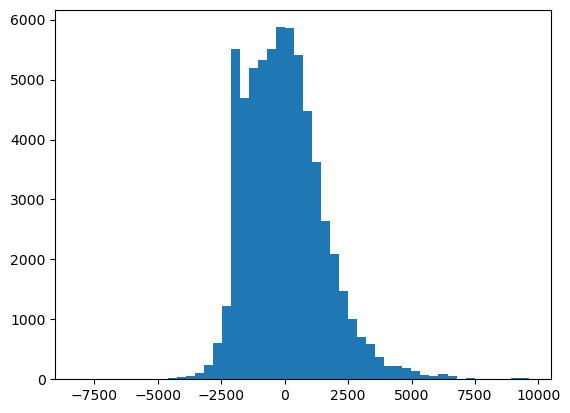

In [ ]:
plt.hist(statarea_full["residual"], bins=50)

In [116]:
statarea_full.hh_MidatDatiyut_Name.value_counts()

hh_MidatDatiyut_Name
חילוני           42622
מסורתי            6411
דתי/ דתי מאוד     3083
חרדי              2941
Name: count, dtype: int64

In [117]:
statarea_full.hh_MidatDatiyut.value_counts()

hh_MidatDatiyut
1.0    42622
2.0     6411
3.0     3083
4.0     2941
Name: count, dtype: int64

In [ ]:
statarea_full_norelig = statarea_full[statarea_full.hh_MidatDatiyut != 4]

In [ ]:
statarea_full_norelig[statarea_full_norelig.month == MONTH][
    [
        "residual",
        "inst_pcnt",
        "Foreign_pcnt",
        "age0_19_pcnt",
        "age20_64_pcnt",
        "age65_pcnt",
        "DependencyRatio",
        "age_median",
        "m_age_median",
        "w_age_median",
        "married18_34_pcnt",
        "married45_54_pcnt",
        "j_isr_pcnt",
        "j_abr_pcnt",
        "aliya2002_pcnt",
        "aliya2010_pcnt",
        "israel_pcnt",
        "asia_pcnt",
        "africa_pcnt",
        "europe_pcnt",
        "america_pcnt",
        "shem_eretz1",
        "MarriageAge_mdn",
        "m_MarriageAge_mdn",
        "w_MarriageAge_mdn",
        "ChldBorn_avg",
        "koshi5_pcnt",
        "koshi65_pcnt",
        "AcadmCert_pcnt",
        "WrkY_pcnt",
        "Empl_pcnt",
        "SelfEmpl_pcnt",
        "HrsWrkWk_avg",
        "Wrk_15_17_pcnt",
        "WrkOutLoc_pcnt",
        "employeesAnnual_medWage",
        "EmployeesWage_decile9Up",
        "SelfEmployedAnnual_medWage",
        "SelfEmployedWage_decile9Up",
        "hh_total_approx",
        "size_avg",
        "hh0_5_pcnt",
        "hh18_24_pcnt",
        "hh_MidatDatiyut",
        "hh_MidatDatiyut_Name",
        "Computer_avg",
        "Vehicle0_pcnt",
        "Vehicle2up_pcnt",
        "Parking_pcnt",
        "own_pcnt",
        "rent_pcnt",
    ]
].dtypes

residual                      float64
inst_pcnt                     float64
Foreign_pcnt                  float64
age0_19_pcnt                  float64
age20_64_pcnt                 float64
age65_pcnt                    float64
DependencyRatio               float64
age_median                    float64
m_age_median                  float64
w_age_median                  float64
married18_34_pcnt             float64
married45_54_pcnt             float64
j_isr_pcnt                    float64
j_abr_pcnt                    float64
aliya2002_pcnt                float64
aliya2010_pcnt                float64
israel_pcnt                   float64
asia_pcnt                     float64
africa_pcnt                   float64
europe_pcnt                   float64
america_pcnt                  float64
shem_eretz1                    object
MarriageAge_mdn               float64
m_MarriageAge_mdn             float64
w_MarriageAge_mdn             float64
ChldBorn_avg                  float64
koshi5_pcnt 

## Error by type of the area

In [ ]:
statarea_full_norelig.groupby("Main_Function_Txt")[
    ["num_homes", "num_works", "residual", "pop_approx"]
].mean()

,num_homes,num_works,residual,pop_approx
Main_Function_Txt,,,,
מגורים,78.474610,35.302914,166.848462,3081.366087
מוסדי,17.627040,137.875291,-1948.292826,54.825175
מתחם ציבורי,13.036058,147.137019,-1944.059162,43.846154
שטח פתוח,6.117647,15.335053,-1714.739988,87.657379
תעשיה,8.665386,269.600576,-1903.893523,10.139222


In [ ]:
statarea_full_norelig["Main_Function_Txt"].unique()

array(['מוסדי', 'מגורים', 'שטח פתוח', 'תעשיה', None, 'מתחם ציבורי'],
      dtype=object)

In [172]:
df_areas_types = (
    statarea_full_norelig.groupby(["month", "Main_Function_Txt"])["num_homes"].sum()
    / statarea_full_norelig.groupby("month")["num_homes"].sum()
).reset_index()

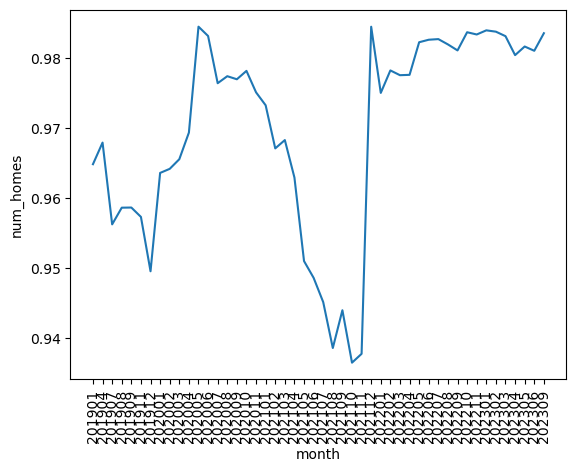

In [173]:
import seaborn as sns
sns.lineplot(data = df_areas_types[df_areas_types["Main_Function_Txt"]=='מגורים']
             , x= 'month'
             , y='num_homes');
plt.xticks(rotation='vertical');

## Test couple of examples with strange home location

In [ ]:
statarea_full_norelig[statarea_full_norelig["Main_Function_Txt"] == "תעשיה"].tail()

,OBJECTID,SHEM_YISHUV_HEB,SHEM_YISHUV_ENG,SEMEL_YISHUV,YISHUV_STAT_2022,STAT_2022,Stat2022_Unite,Stat2022_Ref,Main_Function_Code,Main_Function_Txt,...,rent_pcnt,Shape_Length,Shape_Area,geometry,month,num_homes,num_works,predicted,predicted_pop,residual
63382,3668,הוד השרון,HOD HASHARON,9700,97000034,34.0,None,33.0,2.0,תעשיה,...,NaN,4381.336843,746166.233721,"MULTIPOLYGON (((190697.02 671104.44, 190700.48...",202303,6,639,1837.135730,1837.135730,-1837.135730
63383,3668,הוד השרון,HOD HASHARON,9700,97000034,34.0,None,33.0,2.0,תעשיה,...,NaN,4381.336843,746166.233721,"MULTIPOLYGON (((190697.02 671104.44, 190700.48...",202304,6,327,1892.595640,1892.595640,-1892.595640
63384,3668,הוד השרון,HOD HASHARON,9700,97000034,34.0,None,33.0,2.0,תעשיה,...,NaN,4381.336843,746166.233721,"MULTIPOLYGON (((190697.02 671104.44, 190700.48...",202305,2,468,1834.641073,1834.641073,-1834.641073
63385,3668,הוד השרון,HOD HASHARON,9700,97000034,34.0,None,33.0,2.0,תעשיה,...,NaN,4381.336843,746166.233721,"MULTIPOLYGON (((190697.02 671104.44, 190700.48...",202306,4,505,1890.787677,1890.787677,-1890.787677
63386,3668,הוד השרון,HOD HASHARON,9700,97000034,34.0,None,33.0,2.0,תעשיה,...,NaN,4381.336843,746166.233721,"MULTIPOLYGON (((190697.02 671104.44, 190700.48...",202309,2,329,1869.276187,1869.276187,-1869.276187


201901
            pop_approx  num_homes
pop_approx    1.000000   0.579251
num_homes     0.579251   1.000000


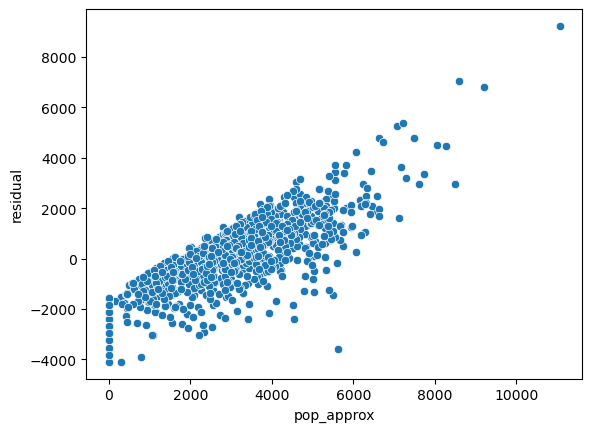

201904
            pop_approx  num_homes
pop_approx    1.000000   0.505368
num_homes     0.505368   1.000000


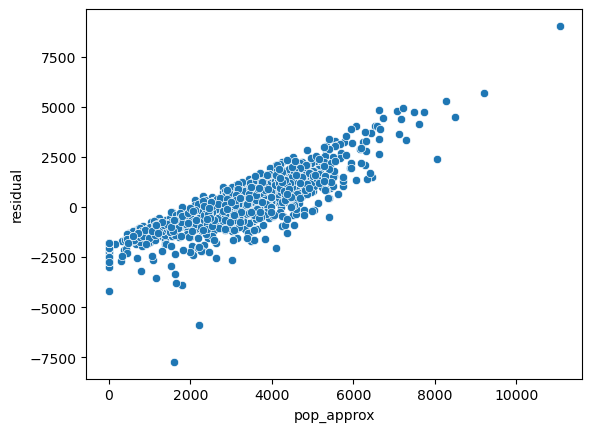

201909
            pop_approx  num_homes
pop_approx    1.000000   0.420605
num_homes     0.420605   1.000000


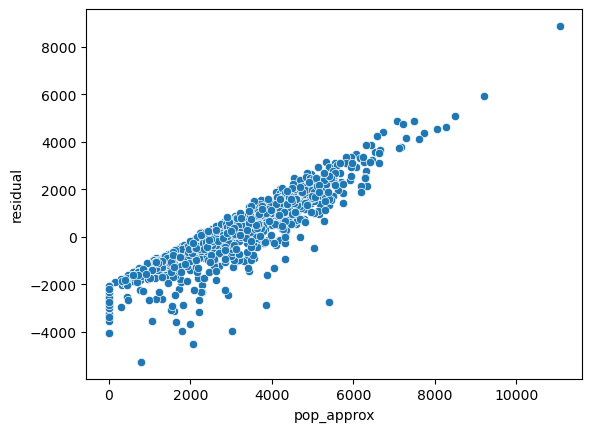

201911
            pop_approx  num_homes
pop_approx    1.000000   0.282914
num_homes     0.282914   1.000000


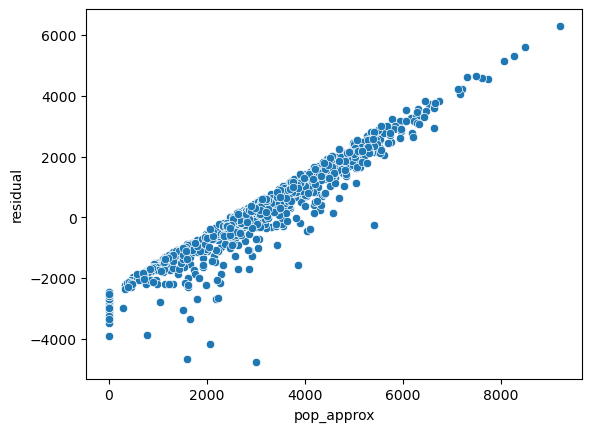

201912
            pop_approx  num_homes
pop_approx    1.000000   0.259485
num_homes     0.259485   1.000000


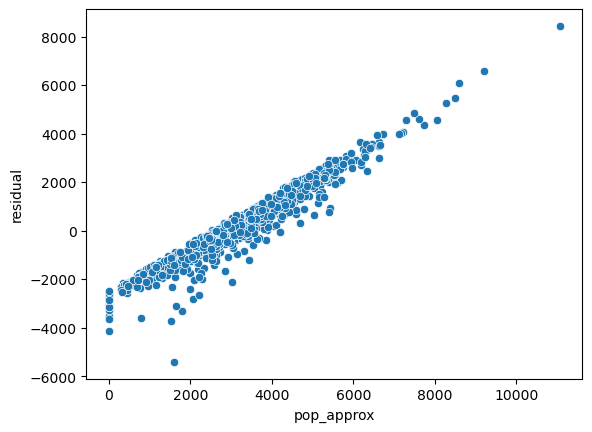

202001
            pop_approx  num_homes
pop_approx    1.000000   0.664399
num_homes     0.664399   1.000000


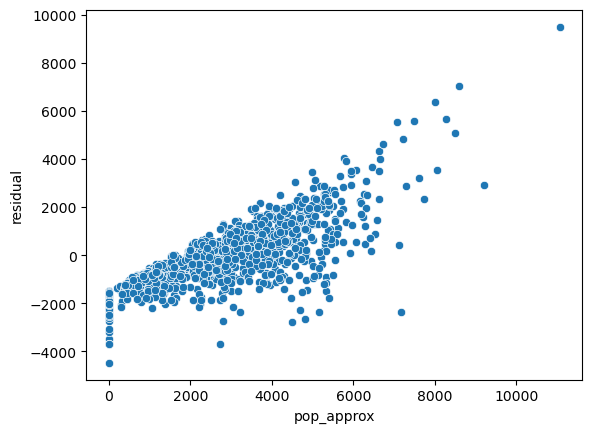

202002
            pop_approx  num_homes
pop_approx    1.000000   0.678428
num_homes     0.678428   1.000000


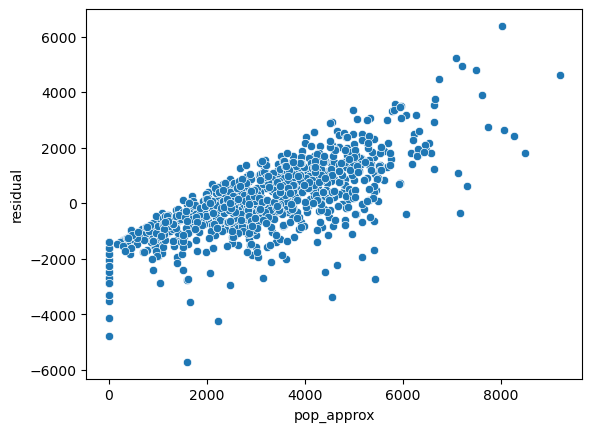

202003
            pop_approx  num_homes
pop_approx    1.000000   0.688005
num_homes     0.688005   1.000000


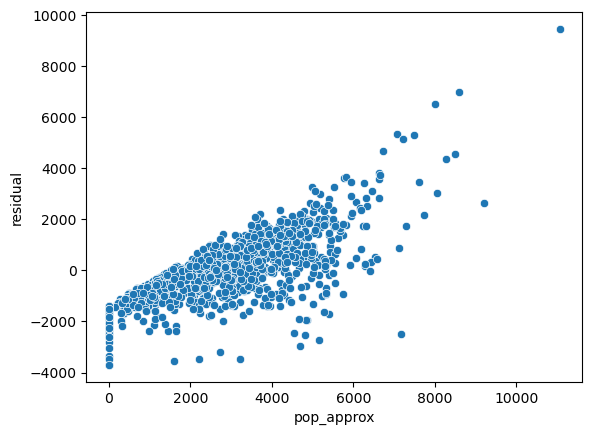

202004
            pop_approx  num_homes
pop_approx    1.000000   0.597189
num_homes     0.597189   1.000000


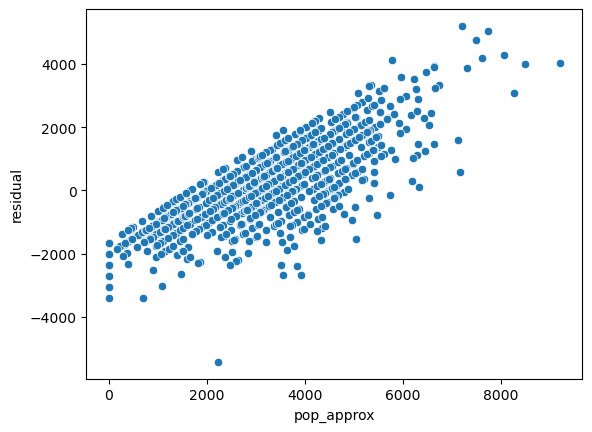

202005
            pop_approx  num_homes
pop_approx    1.000000   0.642173
num_homes     0.642173   1.000000


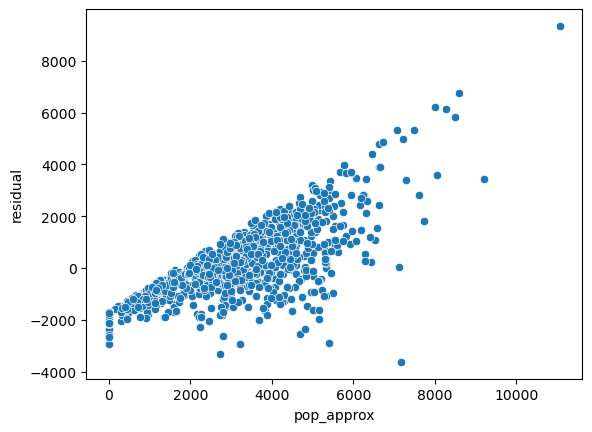

202006
            pop_approx  num_homes
pop_approx    1.000000   0.650335
num_homes     0.650335   1.000000


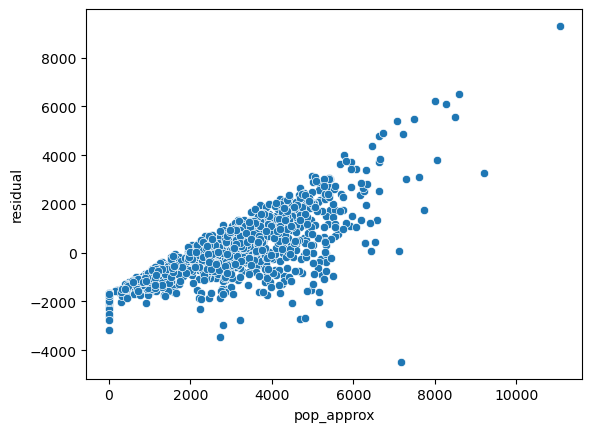

202007
            pop_approx  num_homes
pop_approx    1.000000   0.726307
num_homes     0.726307   1.000000


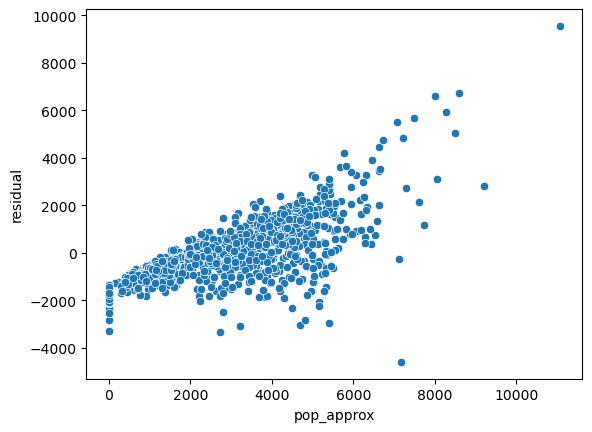

202008
            pop_approx  num_homes
pop_approx    1.000000   0.714809
num_homes     0.714809   1.000000


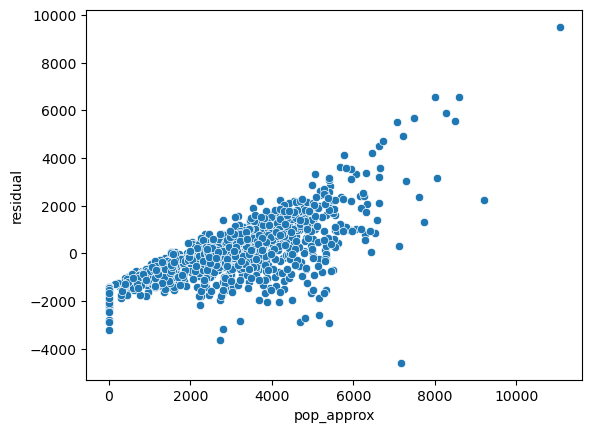

202009
            pop_approx  num_homes
pop_approx    1.000000   0.752533
num_homes     0.752533   1.000000


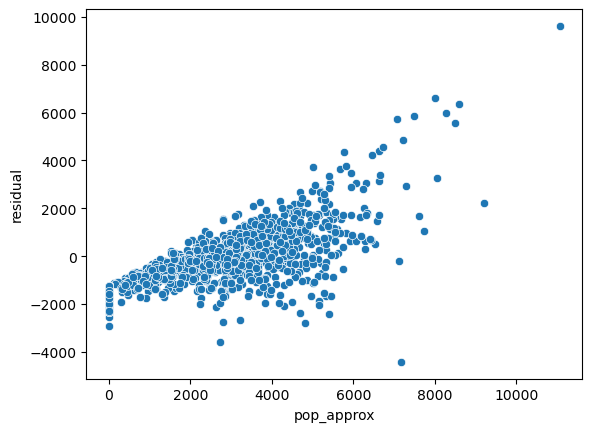

202010
            pop_approx  num_homes
pop_approx    1.000000   0.688253
num_homes     0.688253   1.000000


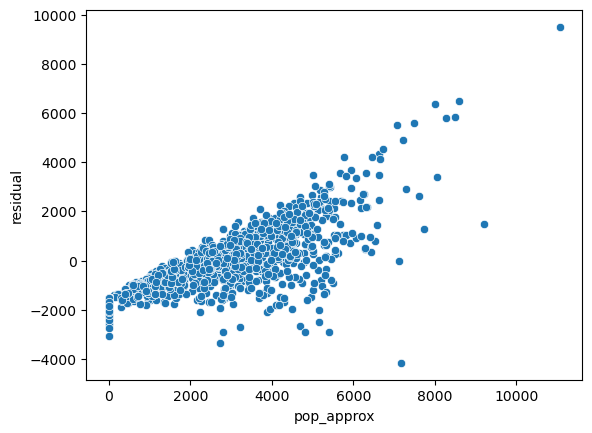

202011
            pop_approx  num_homes
pop_approx    1.000000   0.724353
num_homes     0.724353   1.000000


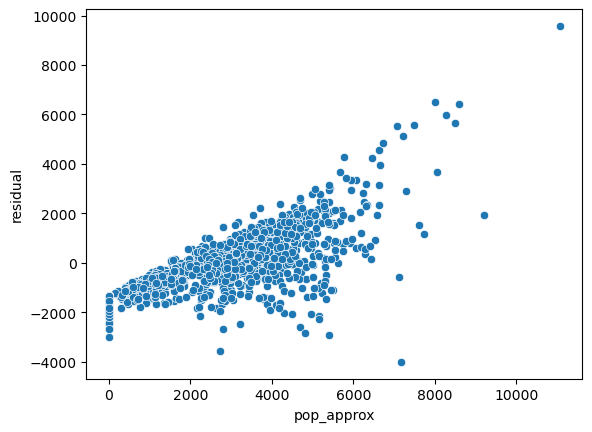

202101
            pop_approx  num_homes
pop_approx    1.000000   0.739485
num_homes     0.739485   1.000000


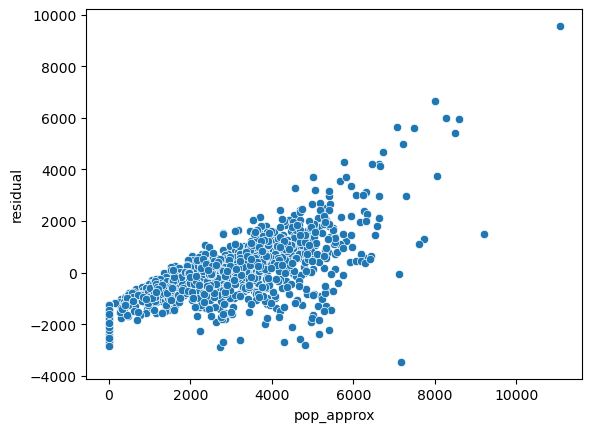

202102
            pop_approx  num_homes
pop_approx    1.000000   0.665234
num_homes     0.665234   1.000000


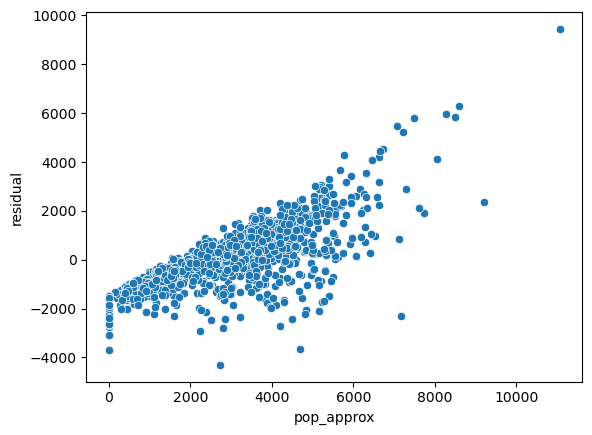

202103
            pop_approx  num_homes
pop_approx    1.000000   0.667052
num_homes     0.667052   1.000000


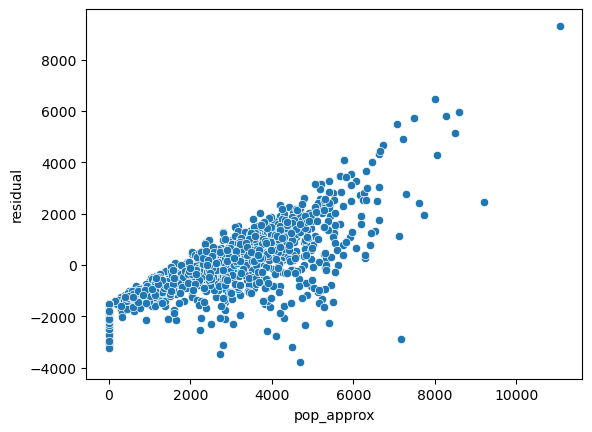

202104
            pop_approx  num_homes
pop_approx    1.000000   0.708355
num_homes     0.708355   1.000000


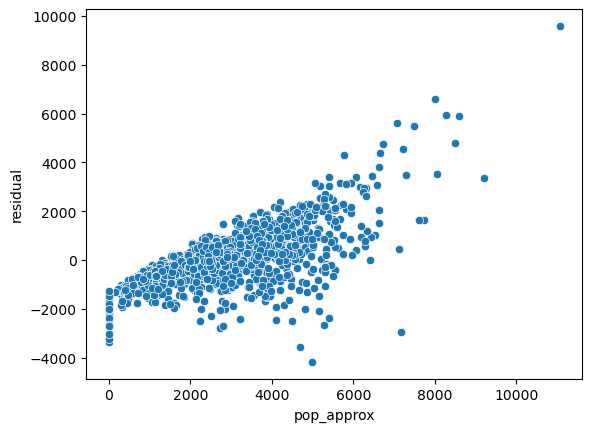

202105
            pop_approx  num_homes
pop_approx    1.000000   0.555879
num_homes     0.555879   1.000000


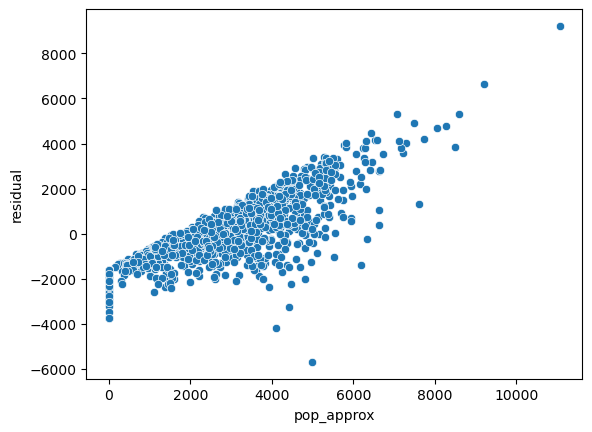

202106
            pop_approx  num_homes
pop_approx    1.000000   0.540467
num_homes     0.540467   1.000000


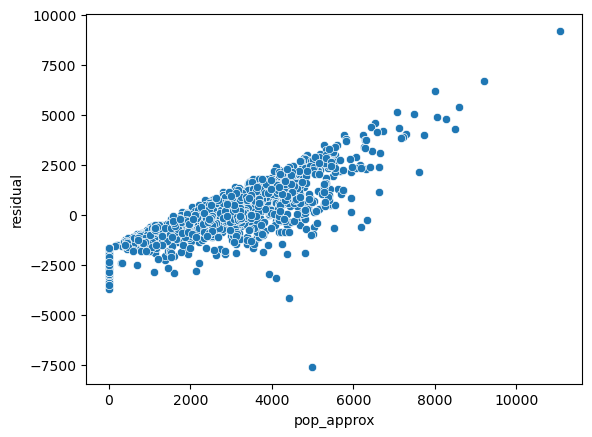

202107
            pop_approx  num_homes
pop_approx    1.000000   0.535752
num_homes     0.535752   1.000000


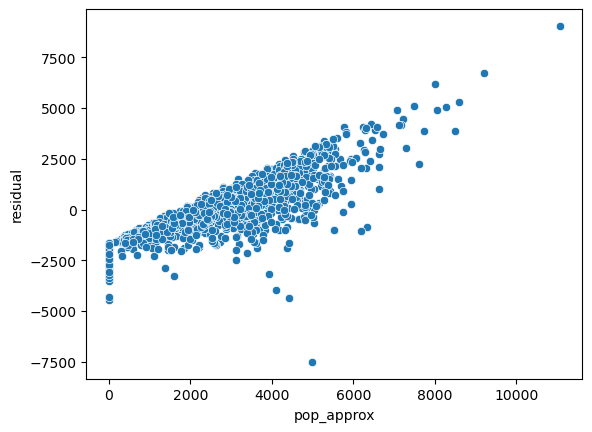

202108
            pop_approx  num_homes
pop_approx    1.000000   0.465142
num_homes     0.465142   1.000000


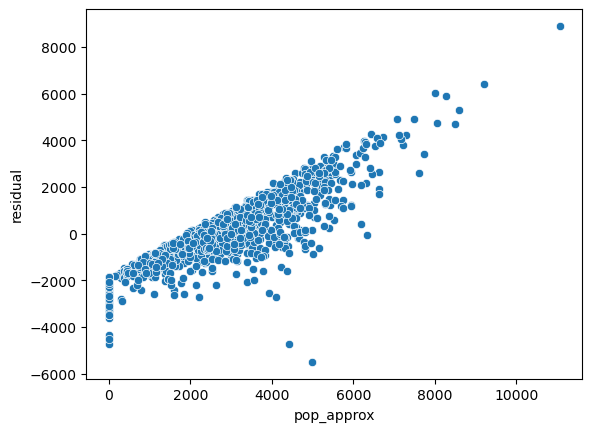

202109
            pop_approx  num_homes
pop_approx    1.000000   0.502442
num_homes     0.502442   1.000000


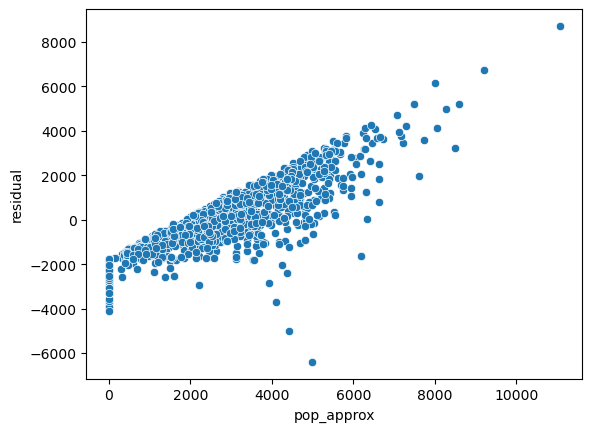

202110
            pop_approx  num_homes
pop_approx    1.000000   0.441764
num_homes     0.441764   1.000000


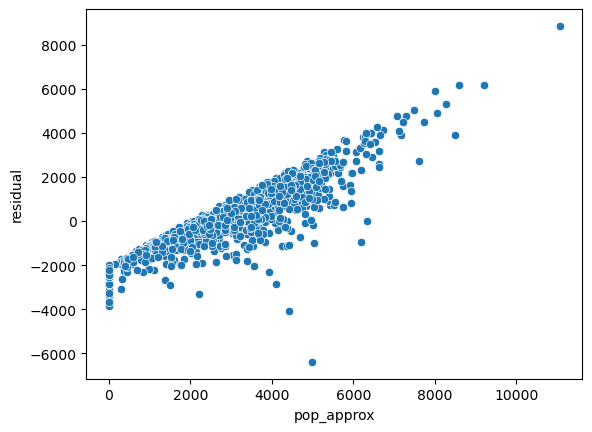

202111
            pop_approx  num_homes
pop_approx    1.000000   0.434183
num_homes     0.434183   1.000000


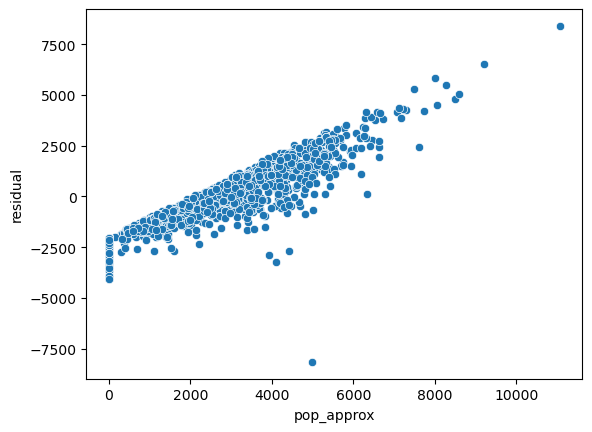

202112
            pop_approx  num_homes
pop_approx    1.000000   0.620799
num_homes     0.620799   1.000000


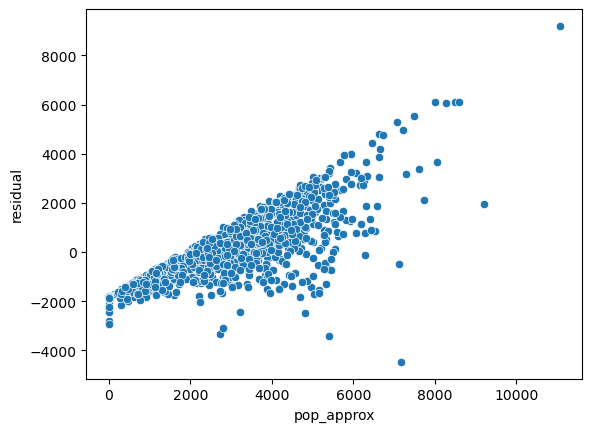

202201
            pop_approx  num_homes
pop_approx    1.000000   0.605768
num_homes     0.605768   1.000000


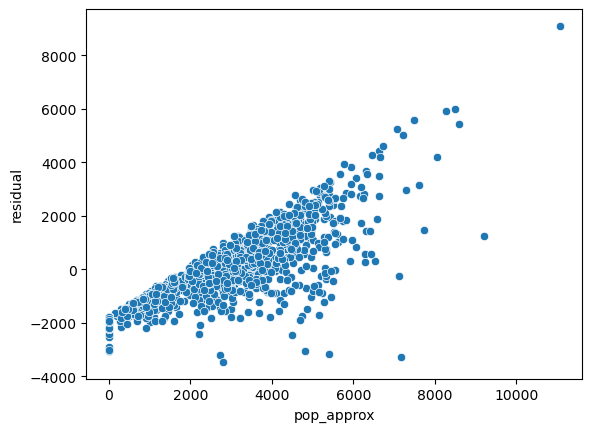

202202
            pop_approx  num_homes
pop_approx    1.000000   0.600348
num_homes     0.600348   1.000000


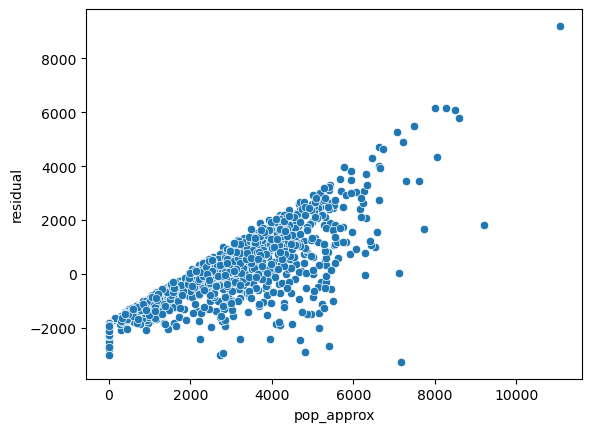

202203
            pop_approx  num_homes
pop_approx    1.000000   0.640074
num_homes     0.640074   1.000000


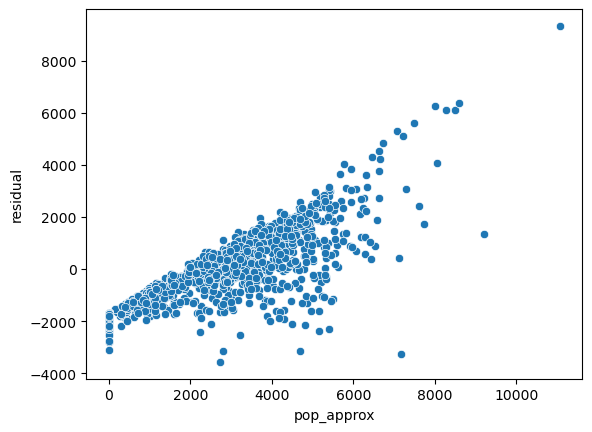

202204
            pop_approx  num_homes
pop_approx    1.000000   0.635925
num_homes     0.635925   1.000000


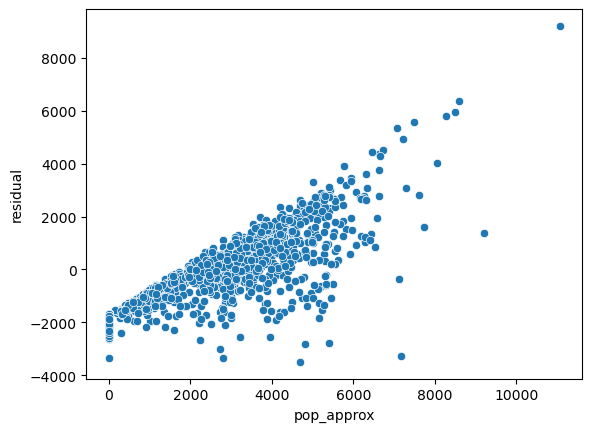

202205
            pop_approx  num_homes
pop_approx    1.000000   0.611151
num_homes     0.611151   1.000000


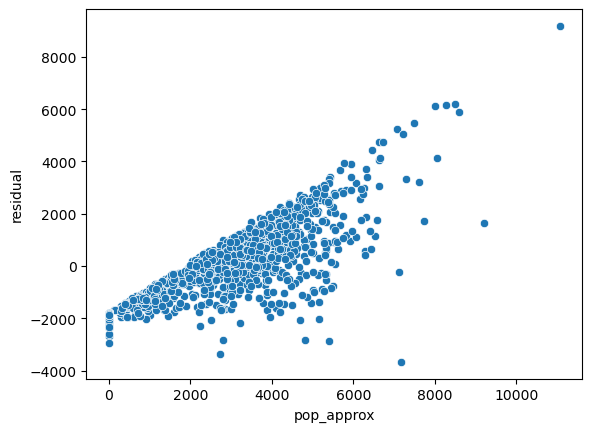

202206
            pop_approx  num_homes
pop_approx    1.000000   0.609721
num_homes     0.609721   1.000000


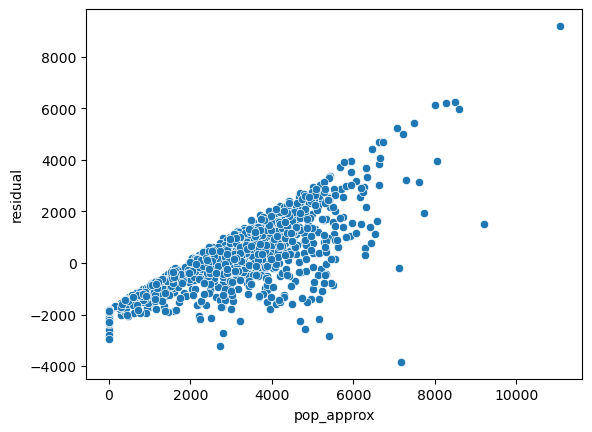

202207
            pop_approx  num_homes
pop_approx    1.000000   0.621321
num_homes     0.621321   1.000000


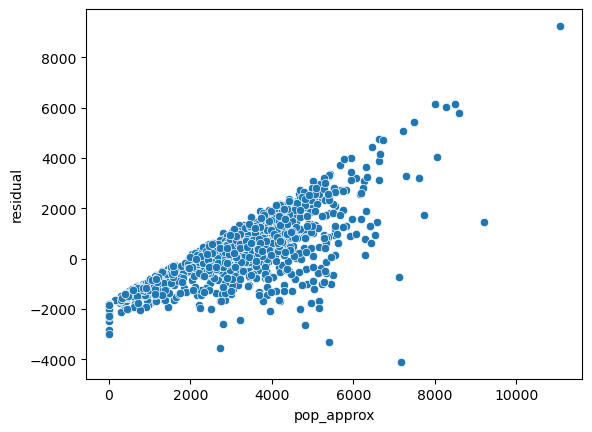

202208
            pop_approx  num_homes
pop_approx    1.000000   0.622508
num_homes     0.622508   1.000000


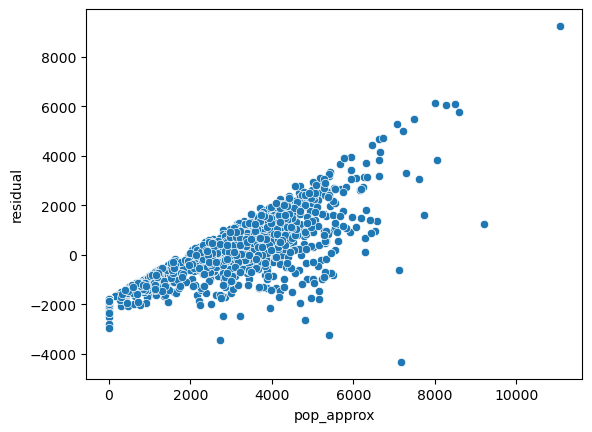

202209
            pop_approx  num_homes
pop_approx    1.000000   0.616524
num_homes     0.616524   1.000000


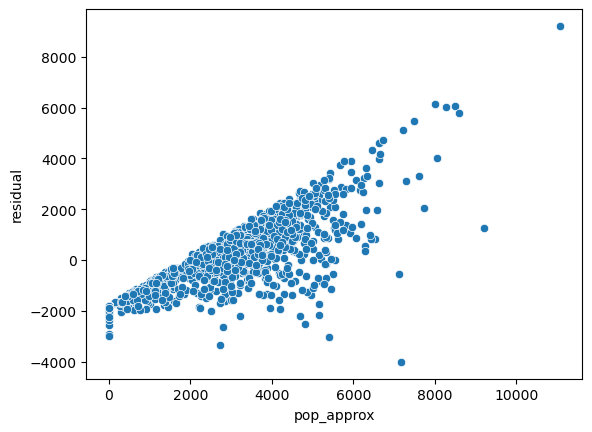

202210
            pop_approx  num_homes
pop_approx    1.000000   0.607916
num_homes     0.607916   1.000000


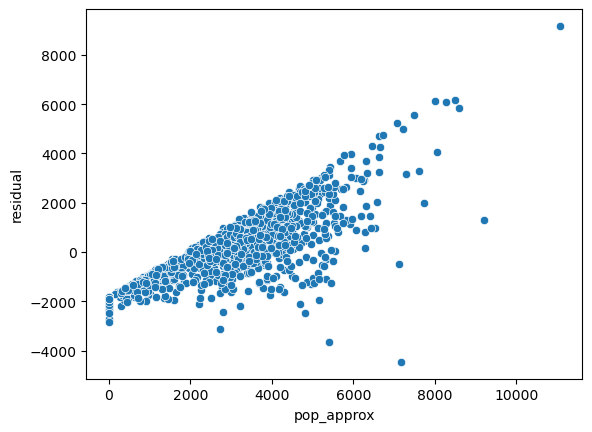

202211
            pop_approx  num_homes
pop_approx    1.000000   0.618883
num_homes     0.618883   1.000000


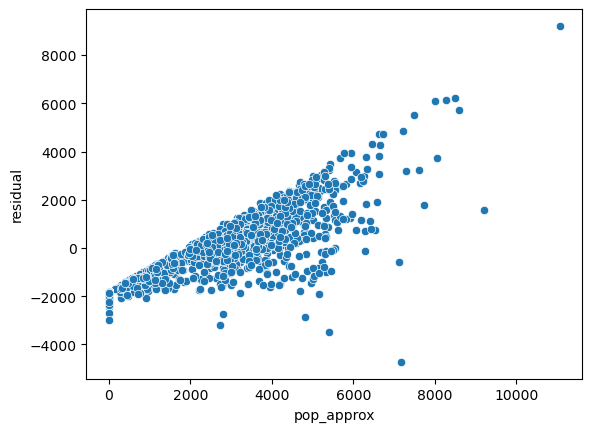

202301
            pop_approx  num_homes
pop_approx    1.000000   0.623266
num_homes     0.623266   1.000000


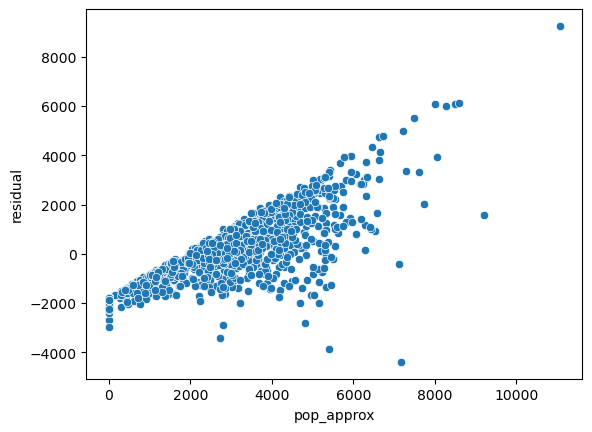

202302
            pop_approx  num_homes
pop_approx    1.000000   0.610017
num_homes     0.610017   1.000000


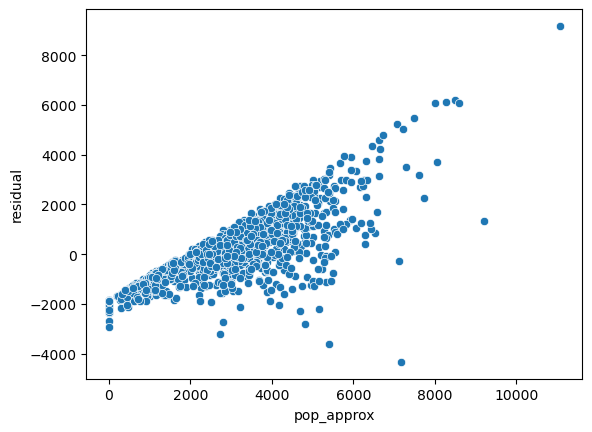

202303
            pop_approx  num_homes
pop_approx    1.000000   0.620827
num_homes     0.620827   1.000000


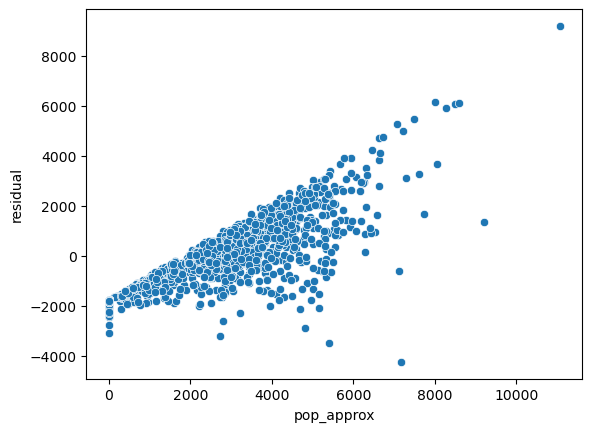

202304
            pop_approx  num_homes
pop_approx    1.000000   0.607676
num_homes     0.607676   1.000000


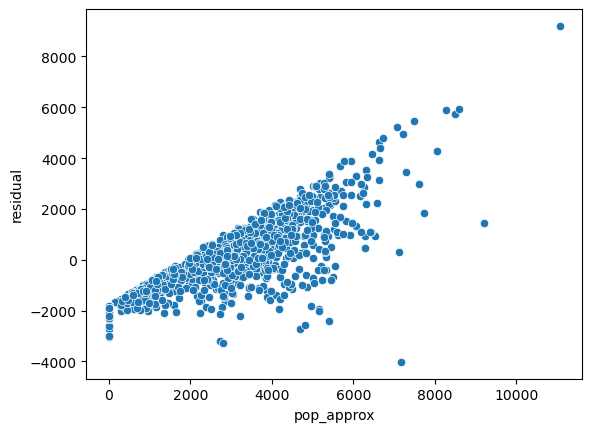

202305
            pop_approx  num_homes
pop_approx    1.000000   0.604271
num_homes     0.604271   1.000000


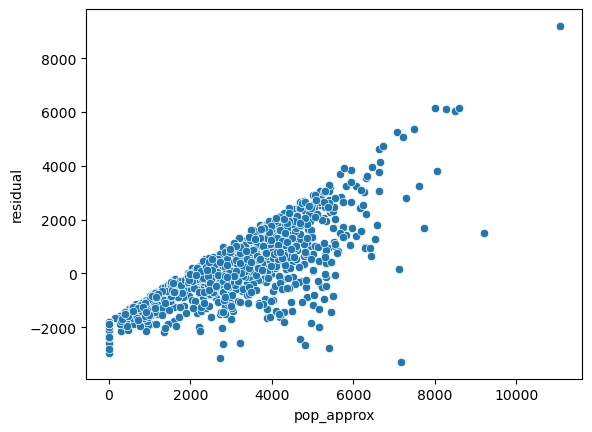

202306
            pop_approx  num_homes
pop_approx    1.000000   0.597772
num_homes     0.597772   1.000000


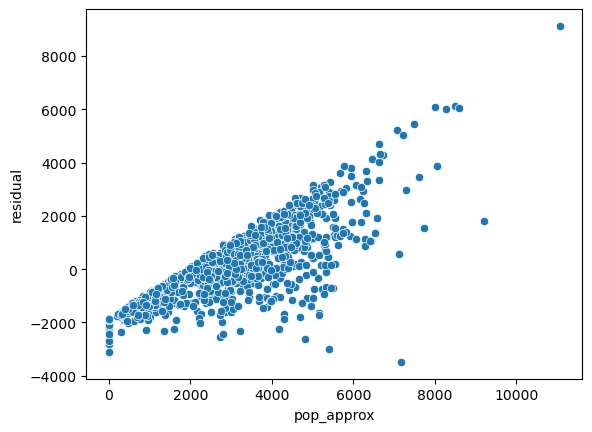

202309
            pop_approx  num_homes
pop_approx    1.000000   0.602767
num_homes     0.602767   1.000000


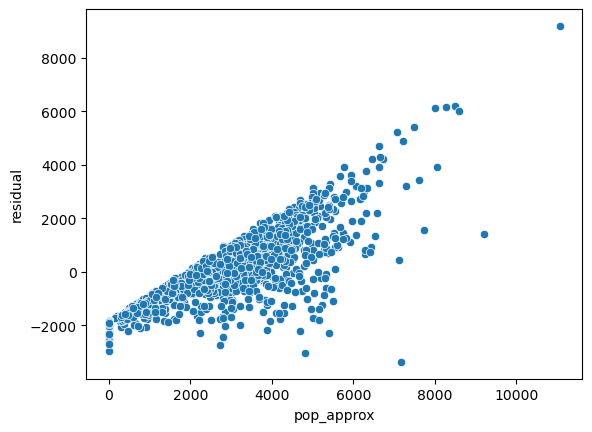

201907
            pop_approx  num_homes
pop_approx    1.000000   0.483024
num_homes     0.483024   1.000000


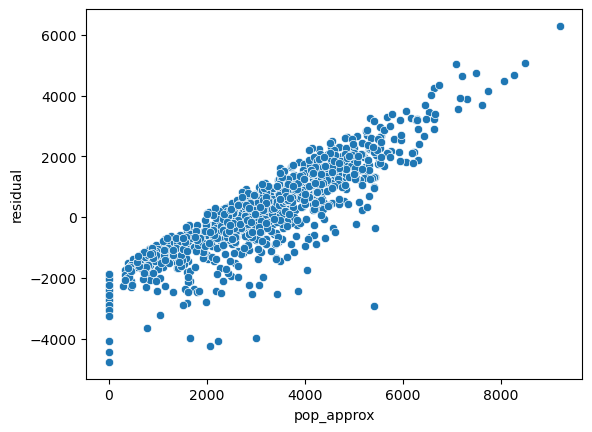

201908
            pop_approx  num_homes
pop_approx     1.00000    0.50562
num_homes      0.50562    1.00000


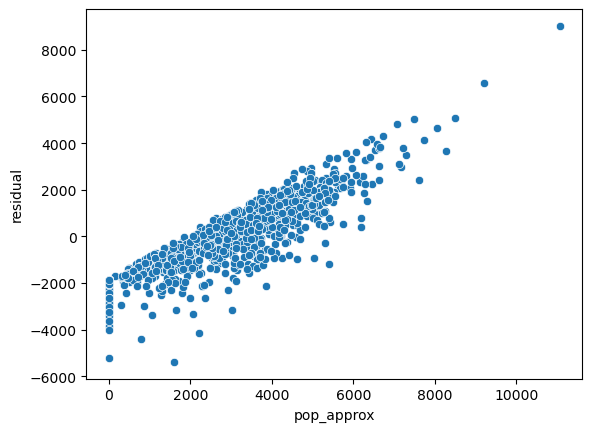

In [ ]:
import seaborn as sn

for MONTH in statarea_full_norelig.month.unique():
    print(MONTH)
    print(
        statarea_full_norelig[statarea_full_norelig.month == MONTH][
            ["pop_approx", "num_homes"]
        ].corr()
    )

    sn.scatterplot(
        x=statarea_full_norelig[statarea_full_norelig.month == MONTH]["pop_approx"],
        y=statarea_full_norelig[statarea_full_norelig.month == MONTH]["residual"],
    )
    plt.show()
    # corr_df = statarea_full_norelig[statarea_full_norelig.month == MONTH][
    #         [
    #             "residual",
    #             'inst_pcnt', 'Foreign_pcnt', 'age0_19_pcnt',
    #    'age20_64_pcnt', 'age65_pcnt', 'DependencyRatio', 'age_median',
    #    'm_age_median', 'w_age_median', 'married18_34_pcnt',
    #    'married45_54_pcnt', 'j_isr_pcnt', 'j_abr_pcnt', 'aliya2002_pcnt',
    #    'aliya2010_pcnt', 'israel_pcnt', 'asia_pcnt', 'africa_pcnt',
    #    'europe_pcnt', 'america_pcnt', 'MarriageAge_mdn',
    #    'm_MarriageAge_mdn', 'w_MarriageAge_mdn', 'ChldBorn_avg', 'koshi5_pcnt',
    #    'koshi65_pcnt', 'AcadmCert_pcnt', 'WrkY_pcnt', 'Empl_pcnt',
    #    'SelfEmpl_pcnt', 'HrsWrkWk_avg', 'Wrk_15_17_pcnt', 'WrkOutLoc_pcnt',
    #    'employeesAnnual_medWage', 'EmployeesWage_decile9Up',
    #    'SelfEmployedAnnual_medWage', 'SelfEmployedWage_decile9Up',
    #    'hh_total_approx', 'size_avg', 'hh0_5_pcnt', 'hh18_24_pcnt',
    #    'hh_MidatDatiyut', 'Computer_avg',
    #    'Vehicle0_pcnt', 'Vehicle2up_pcnt', 'Parking_pcnt', 'own_pcnt',
    #    'rent_pcnt'
    #         ]
    #     ].corr().sort_values(by='residual')[["residual"]]
    # low3 =  corr_df .head(3)
    # high_3 =  corr_df .tail(3)
    # print(MONTH,
    #      low3 ,'\n',
    #       high_3 ,'\n'
    # )

In [123]:
corr_df

,residual
rent_pcnt,-0.365785
age20_64_pcnt,-0.333973
Vehicle0_pcnt,-0.274598
aliya2010_pcnt,-0.226050
Foreign_pcnt,-0.209597
aliya2002_pcnt,-0.207064
SelfEmpl_pcnt,-0.187770
m_age_median,-0.182106
Wrk_15_17_pcnt,-0.180712
america_pcnt,-0.138062


<Axes: xlabel='predicted_pop', ylabel='pop_approx'>

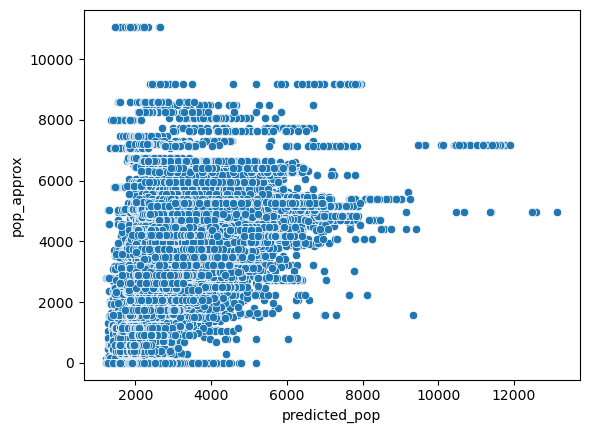